> this notebook has 2 major steps:
1. the model is built and trained on data then it is tested on unseen data
    a. run the training of the classifier few times and consider as metrics avg loss and accuracy
2. the model is tuned and a new one is build with the best parameters, the later is trained and tested again
3. the 3rd model is the iteration of 2nd that takes nr of epochs to train to be the nr of best epoch +1 of tuned model
at the end the results are comapared

In [1]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.8/585.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 50.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> Import Datasets here

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
NIST_dir                       = '/content/gdrive/MyDrive/AnastasiaDatasets/nist-data.csv'
labeled_datasets           = '/content/gdrive/MyDrive/AnastasiaDatasets/data_labeled.csv'
corrected_labeled_datasets = '/content/gdrive/MyDrive/AnastasiaDatasets/data_labeled_corrected.csv'


In [5]:
NIST = pd.read_csv(NIST_dir)
print('the vulnerabily description from 2022 report: ')
print(NIST.shape)

NIST = NIST.drop_duplicates(subset=['full_text'])
drop_indices = np.random.choice(NIST.index, 10000, replace=True)
NIST = NIST.drop(drop_indices)
NIST.reset_index(inplace=True, drop=True)
NIST['label'] = 1
print('the vulnerabily description from 2022 report: ')
print(NIST.shape)

data_labeled = pd.read_csv(labeled_datasets)
print('labeled tweets from keyword filtered stream: ')
print(data_labeled.shape)

test5 = pd.read_csv(corrected_labeled_datasets)
print('labeled test set also from keyword filtered stream: ')
print(test5.shape)

the vulnerabily description from 2022 report: 
(16359, 5)
the vulnerabily description from 2022 report: 
(8049, 6)
labeled tweets from keyword filtered stream: 
(3284, 26)
labeled test set also from keyword filtered stream: 
(1139, 31)


In [6]:
test5

,Unnamed: 0,created_at_x,full_text,retweet_count,favorite_count,lang_x,hashtags,user_mentions,urls,screen_name,...,entities.mentions,entities.urls,entities.hashtags,entities.annotations,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,referenced_tweets
0,0,Thu Sep 11 10:19:25 +0000 2014,Collaborazione per potenziare la sicurezza in ...,0,0,it,[],[],['http://www.melani.admin.ch/dienstleistungen/...,GovCERT_CH,...,NaN,"[{'start': 52, 'end': 74, 'url': 'http://t.co/...",NaN,NaN,0,0,0,0,0,NaN
1,1,Wed Sep 23 16:08:14 +0000 2020,Rilevate nuove versioni dell’email utilizzata ...,1,1,it,"['malspam', 'Emotet']",[],['https://csirt.gov.it/contenuti/emotet-indivi...,csirt_it,...,NaN,"[{'start': 109, 'end': 132, 'url': 'https://t....","[{'start': 61, 'end': 69, 'tag': 'malspam'}, {...",NaN,1,0,1,0,0,NaN
2,2,Wed Nov 18 16:25:02 +0000 2020,Individuate due vulnerabilità #0day nel softwa...,9,8,it,"['0day', 'Cisco', 'RCE']",[],['https://csirt.gov.it/contenuti/vulnerabilita...,csirt_it,...,NaN,"[{'start': 85, 'end': 108, 'url': 'https://t.c...","[{'start': 30, 'end': 35, 'tag': '0day'}, {'st...",NaN,9,1,8,0,0,NaN
3,3,Wed Mar 03 09:49:20 +0000 2021,Sfruttate 4 vulnerabilità #0day per violare se...,5,10,it,"['0day', 'Exchange', 'Microsoft']",[],['https://csirt.gov.it/contenuti/sfruttate-vul...,csirt_it,...,NaN,"[{'start': 131, 'end': 154, 'url': 'https://t....","[{'start': 26, 'end': 31, 'tag': '0day'}, {'st...",NaN,5,0,10,1,0,NaN
4,4,Mon Feb 08 12:07:57 +0000 2021,Malware #sLoad sfrutta #PEC con allegato malev...,11,18,it,"['sLoad', 'PEC']",[],['https://cert-agid.gov.it/news/malware-sload-...,AgidCert,...,NaN,"[{'start': 74, 'end': 97, 'url': 'https://t.co...","[{'start': 8, 'end': 14, 'tag': 'sLoad'}, {'st...",NaN,11,0,18,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,Tue Mar 13 15:28:26 +0000 2012,CERT-GIB at the I-COMference http://t.co/Iw7Fy26z,0,0,en,[],[],['http://I-COMference.ru'],CERTGIB,...,NaN,"[{'start': 29, 'end': 49, 'url': 'http://t.co/...",NaN,"[{'start': 17, 'end': 27, 'probability': 0.529...",0,0,0,0,0,NaN
1135,1135,Tue Apr 26 12:35:46 +0000 2016,Never say never again die Zweite https://t.co/...,2,1,en,[],[],['https://twitter.com/RidT/status/724918933845...,certbund,...,NaN,"[{'start': 33, 'end': 56, 'url': 'https://t.co...",NaN,NaN,2,0,1,0,0,"[{'type': 'quoted', 'id': '724918933845872640'}]"
1136,1136,Wed Nov 17 14:02:02 +0000 2021,https://t.co/BmwtbRvUWR\n \n𝐂𝐓𝐅 𝐈𝐧𝐭𝐞𝐫𝐧𝐚𝐭𝐢𝐨𝐧𝐚𝐥 ...,1,0,en,[],[],['https://fb.watch/9kJ2XlV-xc/'],csirtutpl,...,NaN,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,1,0,0,0,0,NaN
1137,1137,Mon Apr 11 01:30:02 +0000 2022,5 years ago today 🥹 https://t.co/c4uTi8Ubop,4,43,en,[],[],['https://twitter.com/CERTNZ/status/8516407202...,CERTNZ,...,NaN,"[{'start': 20, 'end': 43, 'url': 'https://t.co...",NaN,NaN,4,2,43,0,0,"[{'type': 'quoted', 'id': '851640720293150720'}]"


In [7]:
data_labeled

,Unnamed: 0,id,created_at,full_text,retweeted,favorited,is_quote_status,retweet_count,favorite_count,lang,...,hashtags,user_mentions,urls,user_id,screen_name,description,user_location,full_text1,predictions,label
0,0,5.100000e+17,Thu Sep 11 10:19:25 +0000 2014,Collaborazione per potenziare la sicurezza in ...,False,False,False,0,0,it,...,[],[],['http://www.melani.admin.ch/dienstleistungen/...,2.187916e+09,GovCERT_CH,"National Cyber Security Centre (NCSC), Compute...",Bern,collaborazione potenziare sicurezza rete:,0.999537,0.0
1,1,1.310000e+18,Wed Sep 23 16:08:14 +0000 2020,Rilevate nuove versioni dell’email utilizzata ...,False,False,False,1,1,it,...,"['malspam', 'Emotet']",[],['https://csirt.gov.it/contenuti/emotet-indivi...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,rilevate nuove versioni dell’email utilizzata ...,0.999387,1.0
2,2,1.330000e+18,Wed Nov 18 16:25:02 +0000 2020,Individuate due vulnerabilità #0day nel softwa...,False,False,False,9,8,it,...,"['0day', 'Cisco', 'RCE']",[],['https://csirt.gov.it/contenuti/vulnerabilita...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,individuate vulnerabilità #0day software #cisc...,0.999267,1.0
3,3,1.370000e+18,Wed Mar 03 09:49:20 +0000 2021,Sfruttate 4 vulnerabilità #0day per violare se...,False,False,False,5,10,it,...,"['0day', 'Exchange', 'Microsoft']",[],['https://csirt.gov.it/contenuti/sfruttate-vul...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,sfruttate vulnerabilità #0day violare server #...,0.999266,1.0
4,4,1.360000e+18,Mon Feb 08 12:07:57 +0000 2021,Malware #sLoad sfrutta #PEC con allegato malev...,False,False,False,11,18,it,...,"['sLoad', 'PEC']",[],['https://cert-agid.gov.it/news/malware-sload-...,1.273940e+18,AgidCert,Profilo ufficiale del CERT dell'Agenzia per l'...,Roma - Via Liszt 21,malware #sload sfrutta #pec allegato malevolo ...,0.998893,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,3279,1.070000e+18,Thu Nov 22 09:37:09 +0000 2018,delighted martijn,NaN,NaN,NaN,1,3,en,...,NaN,NaN,NaN,5.618758e+07,irisscert,IRISS-CERT is Ireland's first CSIRT (Computer ...,Dublin,delighted martijn,0.003452,0.0
3280,3280,6.390000e+17,Wed Sep 02 14:45:48 +0000 2015,trend micro продает бизнес китае местной asiainfo,NaN,NaN,NaN,0,0,und,...,NaN,NaN,NaN,1.377952e+08,IlyaShabanov,The founder and CEO of AM Media LLC,Moscow,trend micro продает бизнес китае местной asiainfo,0.002467,0.0
3281,3281,1.460000e+18,Tue Nov 16 21:58:56 +0000 2021,michael,NaN,NaN,NaN,0,2,en,...,NaN,NaN,NaN,5.618758e+07,irisscert,IRISS-CERT is Ireland's first CSIRT (Computer ...,Dublin,michael,0.002257,0.0
3282,3282,1.830000e+17,Thu Mar 22 12:47:33 +0000 2012,челябинская модница :)),NaN,NaN,NaN,0,0,ru,...,NaN,NaN,NaN,1.377952e+08,IlyaShabanov,The founder and CEO of AM Media LLC,Moscow,челябинская модница :)),0.002190,0.0


In [8]:
NIST

,Unnamed: 0,ID,ASSIGNER,full_text,lang,label
0,0,CVE-2022-0001,secure@intel.com,Non-transparent sharing of branch predictor se...,en,1
1,2,CVE-2022-0004,secure@intel.com,Hardware debug modes and processor INIT settin...,en,1
2,4,CVE-2022-0011,psirt@paloaltonetworks.com,PAN-OS software provides options to exclude sp...,en,1
3,5,CVE-2022-0012,psirt@paloaltonetworks.com,An improper link resolution before file access...,en,1
4,9,CVE-2022-0016,psirt@paloaltonetworks.com,An improper handling of exceptional conditions...,en,1
...,...,...,...,...,...,...
8044,16351,CVE-2022-44622,security@jetbrains.com,In JetBrains TeamCity version between 2021.2 a...,en,1
8045,16353,CVE-2022-44624,security@jetbrains.com,"In JetBrains TeamCity version before 2022.10, ...",en,1
8046,16354,CVE-2022-44627,audit@patchstack.com,Cross-Site Request Forgery (CSRF) vulnerabilit...,en,1
8047,16355,CVE-2022-44628,audit@patchstack.com,Auth. (admin+) Stored Cross-Site Scripting (XS...,en,1


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install sweetviz
!pip install keras-tuner
!pip install contractions
!pip install unidecode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
nltk.download('omw-1.4')
#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import collections
# Counting the number of words
from collections import Counter
import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


import tabulate
from tabulate import tabulate
import sweetviz as sv

#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# cross validation and metrics
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


> text cleanning

In [10]:
# !pip install stopwordsiso
# import stopwordsiso
# from stopwordsiso import stopwords
# stopwords = stopwords(['af', 'ar', 'hy', 'eu', 'bn', 'br', 'bg', 'ca', 'zh', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'fi', 'fr', 'gl', 'de', 'el', 'gu', 'ha', 'he', 'hi', 'hu', 'id', 'ga', 'it', 'ja', 'ko', 'ku', 'la', 'lt', 'lv', 'ms', 'mr', 'no', 'fa', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'so', 'st', 'es', 'sw', 'sv', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zu'])  # German, Indonesian, and Chinese stopwords
# # Removing stop words
# def remove_stop_words(text):
#     return ' '.join([word for word in text.split() if word not in stopwords])

# def remove_hashtag(text):
#     return re.sub(r'#\w+', '', text)

# def remove_dog(text):
#     return re.sub(r'@\w+', '', text)

# def remove_punctuations(text):
#     return re.sub('\[[^]]*\]!?.,:;', '', text)

# def remove_characters(text):
#     return re.sub('!$%^&*()_+=-></', ' ', text)

# def remove_url(text):
#     return re.sub(r'http\S+', '', text)

# def remove_urls(text):
#     return re.sub(r'https:\S+', '', text)

# def remove_contractions(text):
#     return ' '.join([contractions.fix(word) for word in text.split()])

# #defining the object for Lemmatization
# lemmatizer = WordNetLemmatizer()
# #defining a function for lemming
# def lemmatize_words(text):
#     return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

# def remove_emojis(text):
#     emoj = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
# #         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
# #         u"\U00002500-\U00002BEF"  # chinese char
#         u"\U00002702-\U000027B0"
# #         u"\U000024C2-\U0001F251" this removes japanesse chr
#         u"\U0001f926-\U0001f937"
#         u"\U00010000-\U0010ffff"
#         u"\u2640-\u2642"
#         u"\u2600-\u2B55"
#         u"\u200d"
#         u"\u23cf"
#         u"\u23e9"
#         u"\u231a"
#         u"\ufe0f"  # dingbats
#         u"\u3030"
#                       "]+", re.UNICODE)
#     return re.sub(emoj, '', text)

# def clean_text(text):
#     text = remove_url(text)
#     text = remove_urls(text)
#     text = remove_contractions(text)
#     text = text.lower()
#     text = remove_punctuations(text)
#     text = remove_hashtag(text)
#     text = remove_dog(text)
#     text = remove_characters(text)# - this is good only for latin alphabets
#     #text = stemming_words(text)
#     text = lemmatize_words(text)
#     text = remove_emojis(text)
#     return text

In [11]:
#data = pd.concat([labeled_data_v3, NIST], ignore_index=True)
data = pd.concat([data_labeled, NIST], ignore_index=True)
# data['full_text_clean'] = data['full_text']
# data['full_text_clean'] = data['full_text_clean'].apply(clean_text)
# data['full_text_clean'] = data['full_text_clean'].apply(remove_stop_words)
# data['full_text_clean']
# data = data.drop_duplicates(subset=['full_text'])
# data.reset_index(inplace=True, drop=True)


In [12]:
# data['full_text'][2562]

In [13]:
# data['full_text_clean'][2562]

In [14]:
import plotly.graph_objs as go

# Compute value counts for the label column
counts = data['label'].value_counts()

# Create a pie chart using plotly
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values,
                             hole=0.6,  # set the size of the center hole
                             marker=dict(colors=['#2B4A9D','#008B8B',  '#CD5C5C']),  # set the color of the slices
                             textfont=dict(size=20))])  # set the size of the slice labels

# Customize the layout
fig.update_layout(title='Label Distribution in Training Data',
                  font=dict(size=16),
                  margin=dict(l=50, r=50, t=50, b=50),
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  width=600,
                  height=600)

# Show the plot
fig.show()

In [15]:
import plotly.graph_objs as go

# Compute value counts for the label column
counts = test5['label'].value_counts()

# Create a pie chart using plotly
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values,
                             hole=0.6,  # set the size of the center hole
                             marker=dict(colors=['#2B4A9D','#008B8B',  '#CD5C5C']),  # set the color of the slices
                             textfont=dict(size=20))])  # set the size of the slice labels

# Customize the layout
fig.update_layout(title='Label Distribution in Test Data',
                  font=dict(size=16),
                  margin=dict(l=50, r=50, t=50, b=50),
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  width=600,  # Update width
                  height=600)  # Update height))

# Show the plot
fig.show()

In [16]:
import plotly.graph_objs as go
from collections import Counter

# Compute value counts for the label column
counts = data['lang'].value_counts()

# Calculate the total count of languages
total_count = counts.sum()

# Filter out languages with percentage less than 1%
filtered_counts = counts[counts/total_count >= 0.0106]

# Calculate the count and percentage of the "others" category
others_count = total_count - filtered_counts.sum()
others_percentage = others_count / total_count

# Add "others" to the filtered counts
filtered_counts['others'] = others_count
# Print the number of languages in the "others" category
num_others_languages = len(filtered_counts) - 1
print(f"Number of languages in 'others': {num_others_languages}")

# Create a pie chart using plotly
fig = go.Figure(data=[go.Pie(labels=filtered_counts.index, values=filtered_counts.values,
                             hole=0.6,
                             marker=dict(colors=['#2B4A9D','#008B8B', '#CD5C5C', '#CCCCCC']),
                             textfont=dict(size=20))])

# Customize the layout
fig.update_layout(title='Language Distribution in Training Data',
                  margin=dict(l=50, r=50, t=50, b=50),
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  width=600,  # Update width
                  height=600  # Update height
                 )

# Show the plot
fig.show()


Number of languages in 'others': 3


In [17]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

> LASER

In [18]:
!pip install -q laserembeddings laserembeddings[zh] laserembeddings[ja]
!pip install -q ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.8/859.8 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 857.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 63.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torc

In [19]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote

  Preparing metadata (setup.py) ... done
  Created wheel for fastcache: filename=fastcache-1.1.0-cp310-cp310-linux_x86_64.whl size=42967 sha256=d56e6cf9ee63125238b4353924f3e251e11f3d651da88cb83a9dfd4b10e7055b
  Stored in directory: /root/.cache/pip/wheels/f5/ea/fc/eebb4e5d80ccd0da9db419de1e9b156c9c2875b5d394727aff
Successfully built fastcache


LASER Embeddings This encodes each of the strings as a LASER embedding (1024 dimentional vector)

In [20]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [21]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [22]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()

    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)

    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)

    return embedding

In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
lb = LabelBinarizer()

data split in train/val set + externat test set. obtain embeddings for the data

In [24]:
# #our test set won't change here
# X_test = test5['full_text_clean']
# y_test = test5['label']
# print(X_test.shape)
# X_test = laser_encode(X_test)
# y_test = lb.fit_transform(y_test)

In [25]:
max_len = 1024
from tensorflow.keras import regularizers
def plot_history(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('binary_accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

> Model FFNN

In [26]:
# epochs = 50 #50 is optimal epoch number obtained after evaluating previous trainings
# batch_size = 64
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)

function to define the FNN network

In [27]:
# def build_model_0():
#         # Build the model
#     model = tf.keras.Sequential([
#         tf.keras.Input(shape=(1024,)),
#         tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
#     ])

#     model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#                   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#                   metrics =  [ tf.keras.metrics.BinaryAccuracy() ])
#     return model

training data is translated in vectors

In [28]:
# X  = data['full_text_clean']
# y  = data['label']
# X = laser_encode(X)
# y = lb.fit_transform(y)


In [29]:
# def train_model(model_func):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
#     model = model_func()
#     history = model.fit(X_train, y_train,
#                         epochs=10,
#                         batch_size=batch_size,
#                         validation_split=0.2,
#                         verbose=1,
#                         validation_data=([X_val, y_val]),
#                         callbacks=callback)
#     print('Test Accuracy: ')
#     loss, accuracy = model.evaluate(X_test, y_test, verbose =1)
#     # Print the evaluation results
#     print('Test loss:', loss)
#     print('Test accuracy:', accuracy)
#     s_loss.append(loss)
#     s_accuracy.append(accuracy)
#     return loss, accuracy, model

The restore_best_weights parameter is set to True, which means that the weights of the best model found during training will be restored when the training stops.

> run 5 times training of Model_0() and average accuracy and other metrics

In [30]:
#lists to keep the results for the final table
accuracy_list = []
loss_list = []
precision_list = []
recall_list = []
f1_score_list = []
auc_roc_list = []
mcc_list = []
model_name = []
training_time = []

In [31]:
import time
class TrainingTimeCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        elapsed_time = end_time - self.start_time
        print("Training time:", elapsed_time, "seconds")
        training_time.append(elapsed_time)

In [32]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef

# # Compute confusion matrix
# def confusion(predictions):
#     cm = confusion_matrix(y_test, predictions)
#     accuracies = cm.diagonal()/cm.sum(axis=1)
#     print(accuracies)
#     print()

#     # Calculate the average accuracy across all classes
#     avg_accuracy = accuracies.mean()
#     # Print the average accuracy
#     print(avg_accuracy)
#     print()

#     # Print confusion matrix
#     classes = np.unique(y_test)
#     print("Confusion matrix:")
#     print(cm)
#     print()

#     # Print normalized confusion matrix
#     cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print("Normalized confusion matrix:")
#     print(cm_norm)
#     print()

#     print("Classification report:")
#     print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

#     auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
#     mcc = matthews_corrcoef(y_test, predictions)
#     print("AUC-ROC:", auc_roc)
#     print("MCC:", mcc)

#     precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
#     print("precision:", precision)
#     print("recall:", recall)
#     print("f1_score:", f1_score)

#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_score_list.append(f1_score)
#     auc_roc_list.append(auc_roc)
#     mcc_list.append(mcc)
#     model_name.append(m)

# def results(model, x, y, x_t, y_t):
#     print('Train Accuracy: ')
#     model.evaluate(x, y, verbose =1)

#     print('Test Accuracy: ')
#     loss, accuracy = model.evaluate(x_t , y_t , verbose =1)
#     # Print the evaluation results
#     print('Test loss:', loss)
#     print('Test accuracy:', accuracy)
#     accuracy_list.append(accuracy)
#     loss_list.append(loss)

#     prediction = model.predict(x_t)
#     for i in range(len(prediction)):
#         if (prediction[i] < 0.5):
#             prediction[i] = 0
#         else:
#             prediction[i] = 1
#     confusion(prediction)


In [33]:
# epochs = 50
# batch_size = 32
# # Initialize counter for saved models
# num_saved_models = 1
# max_len = 1024

# callback = tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# def build_model(sh):
#     # Build the model
#     model = tf.keras.Sequential([
#         tf.keras.Input(shape=(sh,)),
#         tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
#     ])
#     model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#                   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#                   metrics =  [ tf.keras.metrics.BinaryAccuracy() ])
#     print(model.summary())
#     return model


# def model_fit(model,x, y, x_v, y_v):
#     global num_saved_models, m, best_epoch
#     callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)
#     history = model.fit(x, y,
#                         epochs=epochs,
#                         batch_size=batch_size,
#                         validation_split=0.2,
#                         validation_data=([x_v,y_v]),
#                         verbose=0,
#                         callbacks=[callback, TrainingTimeCallback()])

#     plot_history(history)
#     model.save(f"model_{m}_{num_saved_models}.h5")
#     val_acc_per_epoch = history.history['val_binary_accuracy']
#     best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
#     print('Best epoch: %d' % (best_epoch,))
#     # Increment the counter for saved models
#     num_saved_models += 1

In [34]:
# epochs = 50
# for i in range(0, 10):
#     # train - validation split:
#     X_train, X_val, y_train,y_val  = train_test_split(X, y, test_size=0.25, random_state=0)
#     m = 'pr_1_laser_em_batchnorm_l2'
#     model1 = build_model(1024)
#     model_fit(model1, X_train, y_train, X_val, y_val)
#     results(model1, X_train, y_train, X_test, y_test)
#     i += 1

> HP tuning

let's define a function to build the model with hyper parameters to be tuned

In [35]:
# def show_best_hps():
#     print("Best Hyperparameters:")
#     print(f" units_1 : {best_hps.get('units_1')}")
#     print(f" act_1 : {best_hps.get('act_1')}")
#     print(f" dropout_1 : {best_hps.get('dropout_1')}")
#     print(f" units_2 : {best_hps.get('units_2')}")
#     print(f" act_2 : {best_hps.get('act_2')}")
#     print(f" dropout_2 : {best_hps.get('dropout_2')}")
#     print(f" units_3 : {best_hps.get('units_3')}")
#     print(f" act_3 : {best_hps.get('act_3')}")
#     print(f" dropout_3 : {best_hps.get('dropout_3')}")
#     print(f" units_4 : {best_hps.get('units_4')}")
#     print(f" act_4 : {best_hps.get('act_4')}")
#     print(f" dropout_4 : {best_hps.get('dropout_4')}")
#     # print(f"Kernel size: {best_hps.get('kernel_size')}")
#     print(f"Learning rate: {best_hps.get('learning_rate')}")

In [36]:
# def build_model(hp):

#     #hyperparameters for layer 1 - 3
#     hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=128)
#     hp_act_1 = hp.Choice('act_1', ['relu', 'sigmoid'])
#     hp_dropout_1 = hp.Float('dropout_1', 0, 0.5, step=0.1, default=0.25)
#     #hyperparameters for layer 4 - 6
#     hp_units_2 = hp.Int('units_2', min_value=32, max_value=256, step=64)
#     hp_act_2 = hp.Choice('act_2' , ['relu', 'sigmoid' ])
#     hp_dropout_2 = hp.Float('dropout_2', 0, 0.5, step=0.1, default=0.25)
#     #hyperparameters for layer 7 - 9
#     hp_units_3 = hp.Int('units_3', min_value=32, max_value=128, step=32)
#     hp_act_3 = hp.Choice('act_3' , ['relu', 'sigmoid' ])
#     hp_dropout_3 = hp.Float('dropout_3', 0, 0.5, step=0.1, default=0.25)
#     #hyperparameters for layer 10 - 12
#     hp_units_4 = hp.Int('units_4', min_value=32, max_value=64, step=16)
#     hp_act_4 = hp.Choice('act_4' , ['relu', 'sigmoid' ])
#     hp_dropout_4 = hp.Float('dropout_4', 0, 0.5, step=0.1, default=0.25)
#     #hyperparameters for compiling model
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-4])

#     #simple layers to train laser embedded sentences
#     seq_input  = tfkl.Input(shape=(1024,),  name = "Sequential_Input")
#     #input folowed by dense layer 1
#     layer1 = Dense(units = hp_units_1, activation=hp_act_1,
#                    kernel_regularizer=tfk.regularizers.L2(0.001),
#                    name="layer1")(seq_input)
#     layer2 = tfkl.BatchNormalization()(layer1)
#     layer3 = tfkl.Dropout(hp_dropout_1)(layer2)

#     #Dense layer 2
#     layer4 = Dense(units=hp_units_2, kernel_regularizer=tfk.regularizers.L2(0.001),
#                    activation=hp_act_2,name="layer4")(layer3)
#     layer5 = tfkl.BatchNormalization()(layer4)
#     layer6 = tfkl.Dropout(hp_dropout_2)(layer5)

#     #Dense layer 3
#     layer7 = Dense(units=hp_units_3, kernel_regularizer=tfk.regularizers.L2(0.001),
#                    activation=hp_act_3,name="layer7")(layer6)
#     layer8 = tfkl.BatchNormalization()(layer7)
#     layer9 = tfkl.Dropout(hp_dropout_3)(layer8)

#     #Dense layer 4
#     layer10 = Dense(units=hp_units_4, kernel_regularizer=tfk.regularizers.L2(0.001),
#                    activation=hp_act_4 ,name="layer10")(layer9)
#     layer11 = tfkl.BatchNormalization()(layer10)
#     layer12 = tfkl.Dropout(hp_dropout_4)(layer11)

#     # the last layer of binary classification will have the activation function sigmoid
#     output_layer  = tfkl.Dense(units=1, activation=tfk.activations.sigmoid, kernel_initializer=tfk.initializers.GlorotNormal(seed), name='Output')(layer12)

#     model = Model(inputs=seq_input,outputs=[output_layer], name = "CS_AWARE_Model")

#     model.compile(loss = tfk.losses.BinaryCrossentropy(from_logits=True),
#                   optimizer=tfk.optimizers.Adam(learning_rate=hp_learning_rate),
#                   metrics =  ['binary_accuracy'])
#     return model


In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)

In [38]:
#     global history
#     epochs=50
#     #Tuner
#     tuner = RandomSearch(
#         build_model,
#         objective = 'val_binary_accuracy',
#         max_trials = 20,
#         executions_per_trial = 20,
#         #overwrite=True,
#     )
#     # not necessary to see it every time
#     #tuner.search_space_summary()
#     tuner.search_space_summary()
#     # train - validation split:
#     X_train, X_val, y_train,y_val  = train_test_split(X ,y , test_size=0.25, random_state=0)
#     tuner.search(X_train, y_train,
#                     epochs=epochs,
#                     batch_size=batch_size,
#                     validation_split=0.2,
#                     verbose=0,#not necessary to see all trainings
#                     validation_data=([X_val, y_val]),
#                     callbacks=[callback]
#                 )

#     tuner.results_summary()

#     # Get the optimal hyperparameters
#     best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
#     print()
#     print('best parameters that have been found: ')
#     print()
#     print('best parameters that have been found: ')
#     show_best_hps()
#     print()
#     print()
#     # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
#     tuned_model = tuner.hypermodel.build(best_hps)
#     #sow only the model with best params
#     print(tuned_model.summary())
#     m = 'pr_1_laser_tunned_model_l2'
#     history = model_fit(tuned_model, X_train, y_train, X_val, y_val)
#     results(tuned_model, X_train, y_train, X_test, y_test)

#     print('Best epoch: %d' % (best_epoch,))
#     #now include best epoch
#     hypermodel = tuner.hypermodel.build(best_hps)

#     # Retrain the model with best epoch
#     print()
#     print("Retrain the model with best hps and epoch: ")
#     print('Hypermodel: ')
#     m = 'pr_1_laser_hypermodel_l2'
#     model_fit(hypermodel, X_train, y_train, X_val, y_val)
#     results(hypermodel, X_train, y_train, X_test, y_test)


In [39]:
# epochs=50
# for i in range(0, 9):
#     # train - validation split:
#     X_train, X_val, y_train,y_val  = train_test_split(X ,y , test_size=0.25, random_state=0)
#     m = 'pr_1_laser_hypermodel_l2'
#     #   model1 = build_model(1024)
#     model_fit(hypermodel, X_train, y_train, X_val, y_val)
#     results(hypermodel, X_train, y_train, X_test, y_test)
#     m = 'pr_1_laser_tuned_model_l2'
#     model_fit(tuned_model, X_train, y_train, X_val, y_val)
#     results(tuned_model, X_train, y_train, X_test, y_test)
#     i += 1

> now lets try tunning the parameters during every k fold training and compare the results
k-crossvalidation is the same as training the model few times, nothing new will happen here



In [40]:
# k = 5
# metrics = ['binary_accuracy']
# metrics_t = []
# # Initialize the k-fold cross-validation object
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Iterate over each fold
# for fold, (train_index, val_index) in enumerate(kf.split(X)):

#     # Split the data and embeddings into training and validation sets
#     X_train, y_train = X[train_index], y[train_index]
#     X_val, y_val = X[val_index], y[val_index]
#     global history
#     epochs = 50
#     #Tuner
#     tuner = RandomSearch(
#         build_model,
#         objective = 'val_binary_accuracy',
#         max_trials = 20,
#         executions_per_trial = 20,
#         #overwrite=True,
#     )
#     # not necessary to see it every time
#     #tuner.search_space_summary()
#     tuner.search_space_summary()
#     # train - validation split:
#     X_train, X_val, y_train,y_val  = train_test_split(X ,y , test_size=0.25, random_state=0)
#     tuner.search(X_train, y_train,
#                     epochs=epochs,
#                     batch_size=batch_size,
#                     validation_split=0.2,
#                     verbose=0,#not necessary to see all trainings
#                     validation_data=([X_val, y_val]),
#                     callbacks=[callback]
#                 )

#     tuner.results_summary()

#     # Get the optimal hyperparameters
#     best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
#     print()
#     print('best parameters that have been found: ')
#     print()
#     print('best parameters that have been found: ')
#     show_best_hps()
#     print()
#     print()
#     # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
#     tuned_model = tuner.hypermodel.build(best_hps)
#     #sow only the model with best params
#     print(tuned_model.summary())
#     m = 'pr_1_k_cr_val_laser_tunned_model_l2'
#     history = model_fit(tuned_model, X_train, y_train, X_val, y_val)
#     results(tuned_model, X_train, y_train, X_test, y_test)

#     print('Best epoch: %d' % (best_epoch,))
#     #now include best epoch
#     hypermodel = tuner.hypermodel.build(best_hps)

#     # Retrain the model with best epoch
#     print()
#     print("Retrain the model with best hps and epoch: ")
#     print('Hypermodel: ')
#     m = 'pr_1_k_cr_val_laser_hypermodel_l2'
#     model_fit(hypermodel, X_train, y_train, X_val, y_val)
#     results(hypermodel, X_train, y_train, X_test, y_test)


In [41]:
# for i in range(0, 9):
#     # train - validation split:
#     X_train, X_val, y_train,y_val  = train_test_split(X ,y , test_size=0.25, random_state=0)
#     m = 'pr_1_k_cr_val_laser_hypermodel_l2'
#     model_fit(hypermodel, X_train, y_train, X_val, y_val)
#     results(hypermodel, X_train, y_train, X_test, y_test)
#     m = 'pr_1_k_cr_val_laser_tunned_model_l2'
#     model_fit(tuned_model, X_train, y_train, X_val, y_val)
#     results(tuned_model, X_train, y_train, X_test, y_test)
#     i += 1

> LR

In [42]:
# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    loss = log_loss(y_test, predictions)

    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)


    accuracy_list.append(accuracy)
    loss_list.append(loss)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    auc_roc_list.append(auc_roc)
    mcc_list.append(mcc)
    model_name.append(m)

def results(model, x, y, x_t, y_t):
    # Print the evaluation results

    prediction = model.predict(x_t)
    for i in range(len(prediction)):
        if (prediction[i] < 0.5):
            prediction[i] = 0
        else:
            prediction[i] = 1
    confusion(prediction)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss
# def LR_model():
#     # Train a logi
#     global m
#     time_callback = TrainingTimeCallback()
#     #stic regression classifier on the embeddings
#     LR = LogisticRegression()
#     m = 'pr_1_LR_laser'
#     time_callback.on_train_begin()
#     LR.fit(X_train, y_train)
#     time_callback.on_train_end()
#     filename = f"LR_{m}.h5"
#     with open(filename, 'wb') as file:
#         pickle.dump(LR, file)
#     print('Best epoch: %d' % (best_epoch,))
#     # Increment the counter for saved models
#     results(LR, X_train, y_train, X_test, y_test)
# LR_model()

> add new type of cleaning

In [44]:
!pip install stopwordsiso
import stopwordsiso
from stopwordsiso import stopwords
stopwords = stopwords(['af', 'ar', 'hy', 'eu', 'bn', 'br', 'bg', 'ca', 'zh', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'fi', 'fr', 'gl', 'de', 'el', 'gu', 'ha', 'he', 'hi', 'hu', 'id', 'ga', 'it', 'ja', 'ko', 'ku', 'la', 'lt', 'lv', 'ms', 'mr', 'no', 'fa', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'so', 'st', 'es', 'sw', 'sv', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'yo', 'zu'])  # German, Indonesian, and Chinese stopwords
# Removing stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

# #not removing the whole word because it can signalize #vulnerability #cyberattack, etc
# def remove_hashtag(text):
#     return re.sub(r'#', '', text)
def remove_hashtag(text):
    return re.sub(r'(^|\s)#', r'\1', text)

def remove_dog(text):
    return re.sub(r'@\w+', '', text)

def remove_punctuations(text):
    return re.sub('\[[^]]*\]!?.,:;', '', text)

def remove_characters(text):
    return re.sub(r'[^\w\s]', ' ', text)

from unidecode import unidecode
def remove_diacritics(text):
#     return re.sub(r'\W+', '', text).replace('_', '')
    return unidecode(text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_urls(text):
    return re.sub(r'https:\S+', '', text)

def remove_contractions(text):
    return ' '.join([contractions.fix(word) for word in text.split()])

#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
def lemmatize_words(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251" this removes japanesse chr
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

def clean_text(text):
    text = remove_url(text)
    text = remove_urls(text)
    text = remove_hashtag(text)
    text = remove_dog(text)
    text = remove_contractions(text)
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_characters(text)# - this is good only for latin alphabets
#     #text = stemming_words(text)
#     text = lemmatize_words(text)
    text = remove_emojis(text)
    text = remove_diacritics(text)
    return text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.8 MB/s eta 0:00:00


In [45]:
#data = pd.concat([labeled_data_v3, NIST], ignore_index=True)
data = pd.concat([data_labeled, NIST], ignore_index=True)
data['full_text_clean'] = data['full_text']
data['full_text_clean'] = data['full_text_clean'].apply(clean_text)
data['full_text_clean'] = data['full_text_clean'].apply(remove_stop_words)
data['full_text_clean']
data = data.drop_duplicates(subset=['full_text'])
data.reset_index(inplace=True, drop=True)
data

,Unnamed: 0,id,created_at,full_text,retweeted,favorited,is_quote_status,retweet_count,favorite_count,lang,...,user_id,screen_name,description,user_location,full_text1,predictions,label,ID,ASSIGNER,full_text_clean
0,0,5.100000e+17,Thu Sep 11 10:19:25 +0000 2014,Collaborazione per potenziare la sicurezza in ...,False,False,False,0.0,0.0,it,...,2.187916e+09,GovCERT_CH,"National Cyber Security Centre (NCSC), Compute...",Bern,collaborazione potenziare sicurezza rete:,0.999537,0.0,NaN,NaN,collaborazione potenziare sicurezza rete
1,1,1.310000e+18,Wed Sep 23 16:08:14 +0000 2020,Rilevate nuove versioni dell’email utilizzata ...,False,False,False,1.0,1.0,it,...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,rilevate nuove versioni dell’email utilizzata ...,0.999387,1.0,NaN,NaN,rilevate nuove versioni utilizzata campagna ma...
2,2,1.330000e+18,Wed Nov 18 16:25:02 +0000 2020,Individuate due vulnerabilità #0day nel softwa...,False,False,False,9.0,8.0,it,...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,individuate vulnerabilità #0day software #cisc...,0.999267,1.0,NaN,NaN,individuate vulnerabilita 0day software cisco ...
3,3,1.370000e+18,Wed Mar 03 09:49:20 +0000 2021,Sfruttate 4 vulnerabilità #0day per violare se...,False,False,False,5.0,10.0,it,...,1.192510e+18,csirt_it,Account ufficiale del Computer Security Incide...,Italia,sfruttate vulnerabilità #0day violare server #...,0.999266,1.0,NaN,NaN,sfruttate vulnerabilita 0day violare server ex...
4,4,1.360000e+18,Mon Feb 08 12:07:57 +0000 2021,Malware #sLoad sfrutta #PEC con allegato malev...,False,False,False,11.0,18.0,it,...,1.273940e+18,AgidCert,Profilo ufficiale del CERT dell'Agenzia per l'...,Roma - Via Liszt 21,malware #sload sfrutta #pec allegato malevolo ...,0.998893,1.0,NaN,NaN,malware sload sfrutta pec allegato malevolo an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11321,16351,NaN,NaN,In JetBrains TeamCity version between 2021.2 a...,NaN,NaN,NaN,NaN,NaN,en,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CVE-2022-44622,security@jetbrains.com,jetbrains teamcity version 2021 2022 access pe...
11322,16353,NaN,NaN,"In JetBrains TeamCity version before 2022.10, ...",NaN,NaN,NaN,NaN,NaN,en,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CVE-2022-44624,security@jetbrains.com,jetbrains teamcity version 2022 password param...
11323,16354,NaN,NaN,Cross-Site Request Forgery (CSRF) vulnerabilit...,NaN,NaN,NaN,NaN,NaN,en,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CVE-2022-44627,audit@patchstack.com,cross request forgery csrf vulnerability david...
11324,16355,NaN,NaN,Auth. (admin+) Stored Cross-Site Scripting (XS...,NaN,NaN,NaN,NaN,NaN,en,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CVE-2022-44628,audit@patchstack.com,admin stored cross scripting xss vulnerability...


In [46]:
data['full_text_clean']

0                 collaborazione potenziare sicurezza rete
1        rilevate nuove versioni utilizzata campagna ma...
2        individuate vulnerabilita 0day software cisco ...
3        sfruttate vulnerabilita 0day violare server ex...
4        malware sload sfrutta pec allegato malevolo an...
                               ...                        
11321    jetbrains teamcity version 2021 2022 access pe...
11322    jetbrains teamcity version 2022 password param...
11323    cross request forgery csrf vulnerability david...
11324    admin stored cross scripting xss vulnerability...
11325    handy macro stiltsoft handy macros confluence ...
Name: full_text_clean, Length: 11326, dtype: object

In [47]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer

# Initialize the Snowball stemmers for all available languages
nltk.download('snowball_data')
languages = {
    'ar': 'arabic',
    'da': 'danish',
    'nl': 'dutch',
    'en': 'english',
    'fi': 'finnish',
    'fr': 'french',
    'de': 'german',
    'hu': 'hungarian',
    'it': 'italian',
    'no': 'norwegian',
    'porter': 'porter',
    'pt': 'portuguese',
    'ro': 'romanian',
    'ru': 'russian',
    'es': 'spanish',
    'sv': 'swedish'
}

# Example dataset
data = pd.DataFrame(data)

# Stemming function that applies stemming based on the language
def stem_text(text, language):
    if language in languages:
        stemmer = SnowballStemmer(languages[language.lower()])
        return ' '.join([stemmer.stem(word) for word in text.split()])
    else:
        return text

# Apply stemming to the dataset
data['full_text_clean'] = data.apply(lambda row: stem_text(row['full_text_clean'], row['lang']), axis=1)

data['full_text_clean']

[nltk_data] Downloading package snowball_data to /root/nltk_data...


0                             collabor potenz sicurezz ret
1        ril nuov version utilizz campagn malspam distr...
2        individu vulnerabil 0day softw cisc security m...
3        sfrutt vulnerabil 0day viol server exchang pre...
4            malw sload sfrutt pec alleg malevol annid zip
                               ...                        
11321    jetbrain teamciti version 2021 2022 access per...
11322    jetbrain teamciti version 2022 password parame...
11323    cross request forgeri csrf vulner david cole s...
11324    admin store cross script xss vulner jumpdemand...
11325    handi macro stiltsoft handi macro confluenc se...
Name: full_text_clean, Length: 11326, dtype: object

In [48]:
data['full_text'][2562]

'New EU directive requires critical infrastructure to improve cyber-security  https://t.co/MII0gQfhbd via @scmagazine'

In [49]:
data['full_text_clean'][2562]

'direct requir critic infrastructur improv cyber secur'

In [50]:
#our test set won't change here
test5['full_text_clean'] = test5['full_text']
test5['full_text_clean'] = test5['full_text_clean'].apply(clean_text)
test5['full_text_clean'] = test5['full_text_clean'].apply(remove_stop_words)
test5 = pd.DataFrame(test5)

X_test = test5['full_text_clean']
y_test = test5['label']

X_test = laser_encode(X_test)
y_test = lb.fit_transform(y_test)

In [51]:
test5['full_text_clean']

0                collaborazione potenziare sicurezza rete
1       rilevate nuove versioni utilizzata campagna ma...
2       individuate vulnerabilita 0day software cisco ...
3       sfruttate vulnerabilita 0day violare server ex...
4       malware sload sfrutta pec allegato malevolo an...
                              ...                        
1134                                  cert gib comference
1135                                                     
1136                                                     
1137                                                     
1138                                                     
Name: full_text_clean, Length: 1139, dtype: object

In [52]:
X  = data['full_text_clean']
y  = data['label']
X  = laser_encode(X)
y  = lb.fit_transform(y)
print('the text of a tweet: ', data['full_text_clean'][6])
print('the LASER vector:    ', X[6], ' with the shape ', X[6].shape)

the text of a tweet:  fbi cis pubblic cybersecurity advisory csa evidenz dettagl inerent ransomw zeppelin azion mitig ioc dispon
the LASER vector:     [ 0.01701543 -0.00020098 -0.00154571 ...  0.00862663  0.01922498
  0.04765038]  with the shape  (1024,)


In [53]:
data[data['lang']=='it']['full_text_clean']

0                            collabor potenz sicurezz ret
1       ril nuov version utilizz campagn malspam distr...
2       individu vulnerabil 0day softw cisc security m...
3       sfrutt vulnerabil 0day viol server exchang pre...
4           malw sload sfrutt pec alleg malevol annid zip
                              ...                        
1628                    yau stad salvatagg modul persistt
1629                                  yau stad sezion bss
1654    schneiderelectric san moltepl vulnerabil dispo...
1664    sonicwall ril vulnerabil disposit sslvpn sma10...
1668                            kernsomw ransomw ital fas
Name: full_text_clean, Length: 1633, dtype: object

In [54]:
import pickle

def LR_model():
    # Train a logi
    global m
    time_callback = TrainingTimeCallback()
    #stic regression classifier on the embeddings
    LR = LogisticRegression()
    m = 'LR_laser'
    time_callback.on_train_begin()
    LR.fit(X , y )
    time_callback.on_train_end()
    filename = f"/content/gdrive/MyDrive/Models/LR_{m}.h5"
    with open(filename, 'wb') as file:
        pickle.dump(LR, file)
#     print('Best epoch: %d' % (best_epoch,))
    # Increment the counter for saved models
    results(LR, X , y , X_test, y_test)
LR_model()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training time: 1.3536014556884766 seconds
[0.7        0.82978723]

0.7648936170212766

Confusion matrix:
[[238 102]
 [136 663]]

Normalized confusion matrix:
[[0.7        0.3       ]
 [0.17021277 0.82978723]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.64      0.70      0.67       340
     label 1       0.87      0.83      0.85       799

    accuracy                           0.79      1139
   macro avg       0.75      0.76      0.76      1139
weighted avg       0.80      0.79      0.79      1139

AUC-ROC: 0.7648936170212766
MCC: 0.516235443264032
precision: 0.7515151515151515
recall: 0.7648936170212766
f1_score: 0.7572463768115942
Test loss: 7.531509663397613
Test accuracy: 0.7910447761194029


> next model

In [55]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
import time
# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='macro')
    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    auc_roc_list.append(auc_roc)
    mcc_list.append(mcc)
    model_name.append(m)

def results(model, x, y, x_t, y_t):
    print('Train Accuracy: ')
    model.evaluate(x, y, verbose =1)

    print('Test Accuracy: ')
    loss, accuracy = model.evaluate(x_t , y_t , verbose =1)
    # Print the evaluation results
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    accuracy_list.append(accuracy)
    loss_list.append(loss)

    prediction = model.predict(x_t)
    for i in range(len(prediction)):
        if (prediction[i] < 0.5):
            prediction[i] = 0
        else:
            prediction[i] = 1
    confusion(prediction)
epochs = 50
batch_size = 32
# Initialize counter for saved models
num_saved_models = 1
# epochs = 200
max_len = 1024

callback = tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)


def build_model(sh):
    # Build the model
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(sh,)),
        tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
    ])
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  metrics =  [ tf.keras.metrics.BinaryAccuracy() ])
    print(model.summary())
    return model


def model_fit(model,x, y, x_v, y_v):
    global num_saved_models, m, best_epoch
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)
    history = model.fit(x, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        validation_data=([x_v,y_v]),
                        verbose=1,
#                         callbacks=callback,
                        callbacks=[callback,TrainingTimeCallback()])

    plot_history(history)
    model.save(f"/content/gdrive/MyDrive/Models/model_{m}_{num_saved_models}.h5")
    val_acc_per_epoch = history.history['val_binary_accuracy']
    best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    print('Best epoch: %d' % (best_epoch,))
    # Increment the counter for saved models
    num_saved_models += 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

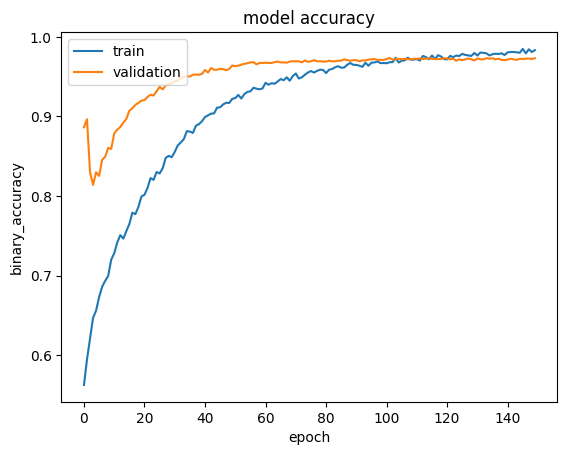

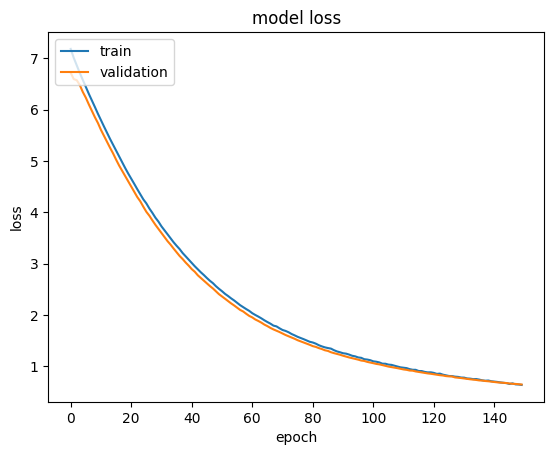

Best epoch: 102
Train Accuracy: 
266/266 [==============================] - 1s 3ms/step - loss: 0.5800 - binary_accuracy: 0.9958
Test Accuracy: 
36/36 [==============================] - 0s 10ms/step - loss: 0.8450 - binary_accuracy: 0.8894
Test loss: 0.8449965715408325
Test accuracy: 0.8893766403198242
36/36 [==============================] - 0s 6ms/step
[0.88529412 0.89111389]

0.8882040050062578

Confusion matrix:
[[301  39]
 [ 87 712]]

Normalized confusion matrix:
[[0.88529412 0.11470588]
 [0.10888611 0.89111389]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.78      0.89      0.83       340
     label 1       0.95      0.89      0.92       799

    accuracy                           0.89      1139
   macro avg       0.86      0.89      0.87      1139
weighted avg       0.90      0.89      0.89      1139

AUC-ROC: 0.8882040050062577
MCC: 0.749664635678537
precision: 0.8619212184441363
recall: 0.8882040050062578
f1_score: 0.87281

In [56]:
epochs=150
for i in range(0, 1):
    # train - validation split:
    X_train, X_val, y_train,y_val  = train_test_split(X ,y , test_size=0.25, random_state=0)
    m = 'FFNN_laser'
    model1 = build_model(1024)
    model_fit(model1, X_train, y_train, X_val, y_val)
    results(model1, X_train, y_train, X_test, y_test)
    i += 1

In [57]:
# model_name = ['LR_laser', 'FFNN_laser']

# accuracy_list = [0.677130, 0.717489]
# loss_list = [11.151755,  1.182955]
# precision_list = [0.720717, 0.733391]
# recall_list = [0.710206, 0.737471]
# f1_score_list= [0.676343, 0.717284]
# auc_roc_list = [0.710206, 0.737471]
# mcc_list = [0.430795, 0.470844]
# training_time = [1.266331, 441.174413]

In [58]:
# accuracy_list

In [59]:
data = pd.DataFrame()

for i in range(len(model_name)):

  elem = {
      "Model": model_name[i],
      "Accuracy": accuracy_list[i],
      "Loss": loss_list[i],
      "Precision": precision_list[i],
      "Recall": recall_list[i],
      "F1 Score": f1_score_list[i],
      "AUC-ROC": auc_roc_list[i],
      "MCC": mcc_list[i],
      "training_time":training_time[i]
  }

  row = pd.DataFrame([elem])
  data = pd.concat([data, row])

data
# df.to_excel('models_results.xlsx', index=False, encoding='utf-8-sig')

,Model,Accuracy,Loss,Precision,Recall,F1 Score,AUC-ROC,MCC,training_time
0,LR_laser,0.791045,7.531510,0.751515,0.764894,0.757246,0.764894,0.516235,1.353601
0,FFNN_laser,0.889377,0.844997,0.861921,0.888204,0.872816,0.888204,0.749665,388.950045


In [60]:

grouped_results = data.reset_index().groupby('Model').mean().sort_values('index')
grouped_results = grouped_results.drop('index', axis=1)

grouped_results.reset_index(level=0, inplace=True)
# grouped_results.to_excel('grouped_results.xlsx', index=False, encoding='utf-8-sig')

In [61]:
grouped_results

,Model,Accuracy,Loss,Precision,Recall,F1 Score,AUC-ROC,MCC,training_time
0,FFNN_laser,0.889377,0.844997,0.861921,0.888204,0.872816,0.888204,0.749665,388.950045
1,LR_laser,0.791045,7.531510,0.751515,0.764894,0.757246,0.764894,0.516235,1.353601


In [62]:
grouped_results = grouped_results[grouped_results['Model'] != 'laser_em_batchnorm_l2']
grouped_results

,Model,Accuracy,Loss,Precision,Recall,F1 Score,AUC-ROC,MCC,training_time
0,FFNN_laser,0.889377,0.844997,0.861921,0.888204,0.872816,0.888204,0.749665,388.950045
1,LR_laser,0.791045,7.531510,0.751515,0.764894,0.757246,0.764894,0.516235,1.353601


In [63]:
# grouped_results = df.reset_index().groupby('Model').mean().sort_values('index')
# grouped_results = grouped_results.drop('index', axis=1)

# grouped_results.reset_index(level=0, inplace=True)
# grouped_results.to_excel('grouped_results.xlsx', index=False, encoding='utf-8-sig')

In [64]:
import plotly.graph_objs as go

# Count occurrences by model
counts = grouped_results['Accuracy']
model_names = grouped_results['Model']
# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=model_names, y=counts,
                             marker_color='#008B8B',  # set the color of the bars
                             text=[f'{model}: {accuracy:.0%}' for model, accuracy in zip(model_names, counts)],  # add model name and accuracy values as percentage to the bars
                             textposition='auto')])  # position the labels inside the bars

# Customize the layout
fig.update_layout(title='Accuracy by Model',
                  xaxis_title='Models',
                  yaxis_title='Accuracy',
                  font=dict(size=16),
                  margin=dict(l=50, r=50, t=50, b=50),
                  plot_bgcolor='#F8F8FF',
                  paper_bgcolor='#F8F8FF',
                  width=600,  # Update width
                  height=600)
# Adjust the width of the bars
fig.update_traces(marker=dict(line=dict(width=0.5)))  # decrease the width of the bars

# Show the plot
fig.show()


In [65]:
def plot_history(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('binary_accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [66]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report
# Compute confusion matrix
def confusion(predictions):
    cm = confusion_matrix(y_test1, predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    print(accuracies)
    print()

    # Calculate the average accuracy across all classes
    avg_accuracy = accuracies.mean()
    # Print the average accuracy
    print(avg_accuracy)
    print()

    # Print confusion matrix
    classes = np.unique(y_test1)
    print("Confusion matrix:")
    print(cm)
    print()

    # Print normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix:")
    print(cm_norm)
    print()

    print("Classification report:")
    print(classification_report(y_test1, predictions, target_names=[f"label {c}" for c in classes]))

    auc_roc = roc_auc_score(y_test1, predictions) # y_pred_prob is the predicted probability of class 1
    mcc = matthews_corrcoef(y_test1, predictions)
    print("AUC-ROC:", auc_roc)
    print("MCC:", mcc)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test1, predictions, average='macro')
    print("precision:", precision)
    print("recall:", recall)
    print("f1_score:", f1_score)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    auc_roc_list.append(auc_roc)
    mcc_list.append(mcc)
    model_name.append(m)

def results(model, x, y, x_t, y_t):
    print('Train Accuracy: ')
    model.evaluate(x, y, verbose =1)

    print('Test Accuracy: ')
    loss, accuracy = model.evaluate(x_t , y_t , verbose =1)
    # Print the evaluation results
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    accuracy_list.append(accuracy)
    loss_list.append(loss)

    prediction = model.predict(x_t)
    for i in range(len(prediction)):
        if (prediction[i] < 0.5):
            prediction[i] = 0
        else:
            prediction[i] = 1
    confusion(prediction)


In [67]:
def show_best_hps():
    print("Best Hyperparameters:")
    print(f" units_1 : {best_hps.get('units_1')}")
    print(f" act_1 : {best_hps.get('act_1')}")
    print(f" dropout_1 : {best_hps.get('dropout_1')}")
    print(f" units_2 : {best_hps.get('units_2')}")
    print(f" act_2 : {best_hps.get('act_2')}")
    print(f" dropout_2 : {best_hps.get('dropout_2')}")
    print(f" units_3 : {best_hps.get('units_3')}")
    print(f" act_3 : {best_hps.get('act_3')}")
    print(f" dropout_3 : {best_hps.get('dropout_3')}")
    print(f" units_4 : {best_hps.get('units_4')}")
    print(f" act_4 : {best_hps.get('act_4')}")
    print(f" dropout_4 : {best_hps.get('dropout_4')}")
    # print(f"Kernel size: {best_hps.get('kernel_size')}")
    print(f"Learning rate: {best_hps.get('learning_rate')}")


def build_model_tune(hp):

    #hyperparameters for layer 1 - 3
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=128)
    hp_act_1 = hp.Choice('act_1', ['relu', 'sigmoid'])
    hp_dropout_1 = hp.Float('dropout_1', 0, 0.5, step=0.1, default=0.25)
    #hyperparameters for layer 4 - 6
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=256, step=64)
    hp_act_2 = hp.Choice('act_2' , ['relu', 'sigmoid' ])
    hp_dropout_2 = hp.Float('dropout_2', 0, 0.5, step=0.1, default=0.25)
    #hyperparameters for layer 7 - 9
    hp_units_3 = hp.Int('units_3', min_value=32, max_value=128, step=32)
    hp_act_3 = hp.Choice('act_3' , ['relu', 'sigmoid' ])
    hp_dropout_3 = hp.Float('dropout_3', 0, 0.5, step=0.1, default=0.25)
    #hyperparameters for layer 10 - 12
    hp_units_4 = hp.Int('units_4', min_value=32, max_value=64, step=16)
    hp_act_4 = hp.Choice('act_4' , ['relu', 'sigmoid' ])
    hp_dropout_4 = hp.Float('dropout_4', 0, 0.5, step=0.1, default=0.25)
    #hyperparameters for compiling model
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-4])

    #simple layers to train laser embedded sentences
    seq_input  = tfkl.Input(shape=(1024,),  name = "Sequential_Input")
    #input folowed by dense layer 1
    layer1 = Dense(units = hp_units_1, activation=hp_act_1,
                   kernel_regularizer=tfk.regularizers.L2(0.001),
                   name="layer1")(seq_input)
    layer2 = tfkl.BatchNormalization()(layer1)
    layer3 = tfkl.Dropout(hp_dropout_1)(layer2)

    #Dense layer 2
    layer4 = Dense(units=hp_units_2, kernel_regularizer=tfk.regularizers.L2(0.001),
                   activation=hp_act_2,name="layer4")(layer3)
    layer5 = tfkl.BatchNormalization()(layer4)
    layer6 = tfkl.Dropout(hp_dropout_2)(layer5)

    #Dense layer 3
    layer7 = Dense(units=hp_units_3, kernel_regularizer=tfk.regularizers.L2(0.001),
                   activation=hp_act_3,name="layer7")(layer6)
    layer8 = tfkl.BatchNormalization()(layer7)
    layer9 = tfkl.Dropout(hp_dropout_3)(layer8)

    #Dense layer 4
    layer10 = Dense(units=hp_units_4, kernel_regularizer=tfk.regularizers.L2(0.001),
                   activation=hp_act_4 ,name="layer10")(layer9)
    layer11 = tfkl.BatchNormalization()(layer10)
    layer12 = tfkl.Dropout(hp_dropout_4)(layer11)

    # the last layer of binary classification will have the activation function sigmoid
    output_layer  = tfkl.Dense(units=1, activation=tfk.activations.sigmoid, kernel_initializer=tfk.initializers.GlorotNormal(seed), name='Output')(layer12)

    model = Model(inputs=seq_input,outputs=[output_layer], name = "CS_AWARE_Model")

    model.compile(loss = tfk.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tfk.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics =  ['binary_accuracy'])
    return model


In [68]:
def model_fit(model,x, y, x_v, y_v):
    global num_saved_models, m, best_epoch
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)
    history = model.fit(x, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        validation_data=([x_v,y_v]),
                        verbose=0,
                        callbacks=[callback,TrainingTimeCallback()])

    plot_history(history)
    model.save(f"/content/gdrive/MyDrive/Models/model_{m}_{num_saved_models}.h5")
    val_acc_per_epoch = history.history['val_binary_accuracy']
    best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    print('Best epoch: %d' % (best_epoch,))
    # Increment the counter for saved models
    num_saved_models += 1

In [69]:
X_train1, X_val1, y_train1, y_val1  = train_test_split(X, y , test_size=0.30, random_state=0)

In [70]:
X_test1 = X_test
y_test1 = y_test

In [71]:
X_val1.shape

(3398, 1024)

Trial 10 Complete [00h 30m 35s]
val_binary_accuracy: 0.9073866963386535

Best val_binary_accuracy So Far: 0.9753384411334991
Total elapsed time: 04h 17m 18s
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_binary_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units_1: 288
act_1: relu
dropout_1: 0.1
units_2: 32
act_2: sigmoid
dropout_2: 0.30000000000000004
units_3: 32
act_3: sigmoid
dropout_3: 0.30000000000000004
units_4: 32
act_4: sigmoid
dropout_4: 0.30000000000000004
learning_rate: 0.0001
Score: 0.9753384411334991

Trial 01 summary
Hyperparameters:
units_1: 416
act_1: relu
dropout_1: 0.4
units_2: 32
act_2: relu
dropout_2: 0.4
units_3: 96
act_3: relu
dropout_3: 0.2
units_4: 32
act_4: sigmoid
dropout_4: 0.4
learning_rate: 0.0001
Score: 0.9744261384010315

Trial 04 summary
Hyperparameters:
units_1: 288
act_1: relu
dropout_1: 0.0
units_2: 224
act_2: relu
dropout_2: 0.30000000000000004
units_3: 96
act_3: sigmoid
dropout_3: 0.4
units_

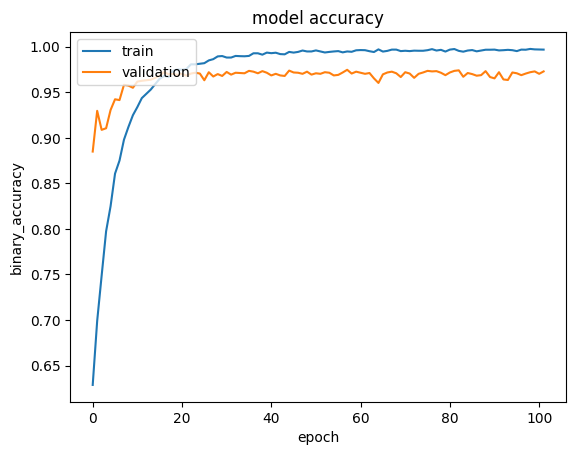

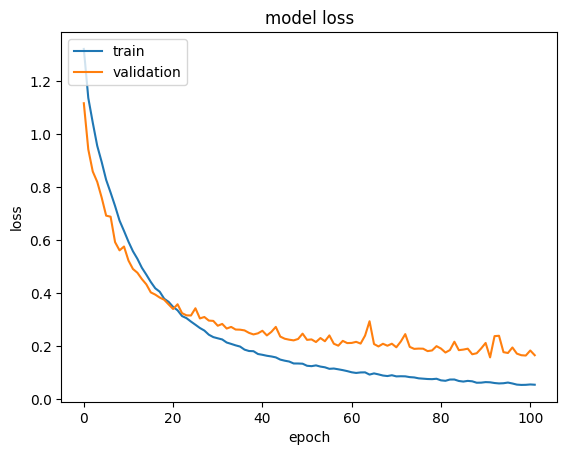

Best epoch: 58
Train Accuracy: 
248/248 [==============================] - 1s 2ms/step - loss: 0.0529 - binary_accuracy: 0.9991
Test Accuracy: 
36/36 [==============================] - 0s 2ms/step - loss: 0.4362 - binary_accuracy: 0.9008
Test loss: 0.4361584186553955
Test accuracy: 0.9007901549339294
36/36 [==============================] - 0s 2ms/step
[0.88529412 0.90738423]

0.8963391739674593

Confusion matrix:
[[301  39]
 [ 74 725]]

Normalized confusion matrix:
[[0.88529412 0.11470588]
 [0.09261577 0.90738423]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.80      0.89      0.84       340
     label 1       0.95      0.91      0.93       799

    accuracy                           0.90      1139
   macro avg       0.88      0.90      0.88      1139
weighted avg       0.91      0.90      0.90      1139

AUC-ROC: 0.8963391739674593
MCC: 0.7718759875752801
precision: 0.8758097731239092
recall: 0.8963391739674593
f1_score: 0.884830

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?



Training time: 230.4466495513916 seconds


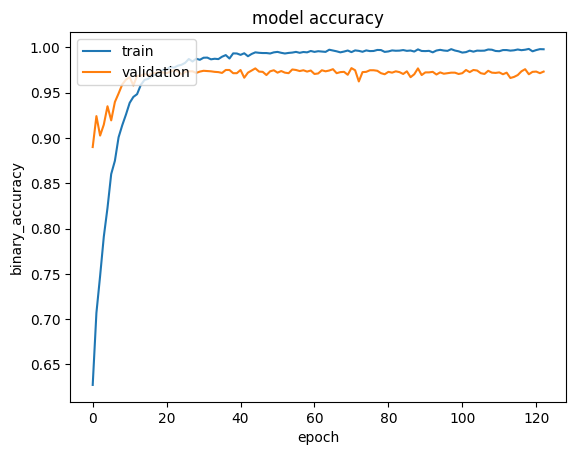

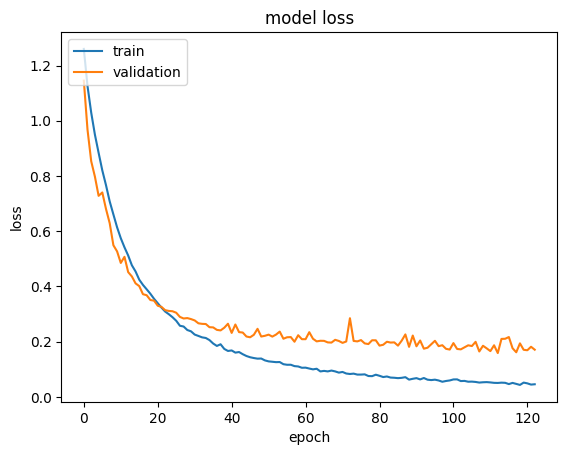

Best epoch: 71
Train Accuracy: 
248/248 [==============================] - 1s 2ms/step - loss: 0.0433 - binary_accuracy: 0.9992
Test Accuracy: 
36/36 [==============================] - 0s 2ms/step - loss: 0.5539 - binary_accuracy: 0.8797
Test loss: 0.5539401769638062
Test accuracy: 0.879719078540802
36/36 [==============================] - 0s 2ms/step
[0.96176471 0.84480601]

0.9032853566958698

Confusion matrix:
[[327  13]
 [124 675]]

Normalized confusion matrix:
[[0.96176471 0.03823529]
 [0.15519399 0.84480601]]

Classification report:
              precision    recall  f1-score   support

     label 0       0.73      0.96      0.83       340
     label 1       0.98      0.84      0.91       799

    accuracy                           0.88      1139
   macro avg       0.85      0.90      0.87      1139
weighted avg       0.90      0.88      0.88      1139

AUC-ROC: 0.9032853566958698
MCC: 0.7546973183640143
precision: 0.8530800417676481
recall: 0.9032853566958698
f1_score: 0.8673348

In [72]:
  epochs = 150
  #Tuner
  tuner = RandomSearch(
      build_model_tune,
      objective = 'val_binary_accuracy',
      max_trials = 10,
      executions_per_trial = 10,
      #overwrite=True,
  )
  # not necessary to see it every time
  tuner.search_space_summary()

  tuner.search(X_train1, y_train1,
                  epochs=50,
                  batch_size=batch_size,
                  validation_split=0.2,
                  verbose=1,
                  validation_data=([X_val1, y_val1])
              )
  tuner.results_summary()

  # Get the optimal hyperparameters
  best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
  print()
  print('best parameters that have been found: ')
  show_best_hps()
  print()

  print()
  # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
  tuned_model = tuner.hypermodel.build(best_hps)
  #sow only the model with best params
  print(tuned_model.summary())
  global history

  m = 'tunned_model_laser'
  history = model_fit(tuned_model, X_train1, y_train1, X_val1, y_val1)
  results(tuned_model, X_train1, y_train1, X_test, y_test)

  print('Best epoch: %d' % (best_epoch,))
  hypermodel = tuner.hypermodel.build(best_hps)

  # Retrain the model with best epoch
  print()
  print("Retrain the model with best hps and epoch: ")
  print('Hypermodel: ')
  m = 'hypermodel_laser'
  model_fit(hypermodel, X_train1, y_train1, X_val1, y_val1)
  results(hypermodel, X_train1, y_train1, X_test, y_test)


In [73]:
# results(tuned_model, X_train1, y_train1, X_test, y_test)



In [74]:

#     print('Best epoch: %d' % (best_epoch,))


#     hypermodel = tuner.hypermodel.build(best_hps)

#     # Retrain the model with best epoch
#     print()
#     print("Retrain the model with best hps and epoch: ")
#     print('Hypermodel: ')
#     m = 'hypermodel_laser'
#     model_fit(hypermodel, X_train1, y_train1, X_val1, y_val1)
#     results(hypermodel, X_train1, y_train1, X_test, y_test)

In [75]:
# loss, accuracy = tuned_model.evaluate(scaled_vectors_test, y_test1, verbose =1)
# # Print the evaluation results
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

In [76]:
model_name

['LR_laser', 'FFNN_laser', 'tunned_model_laser', 'hypermodel_laser']

In [92]:
hypermodel.save('/content/gdrive/MyDrive/Models/hypermodel_laser2.h5')


In [77]:
data3 = pd.DataFrame()

for i in range(len(model_name)):

  elem = {
      "Model": model_name[i],
      "Accuracy": accuracy_list[i],
      "Loss": loss_list[i],
      "Precision": precision_list[i],
      "Recall": recall_list[i],
      "F1 Score": f1_score_list[i],
      "AUC-ROC": auc_roc_list[i],
      "MCC": mcc_list[i],
      "training_time":training_time[i]
  }

  row = pd.DataFrame([elem])
  data3 = pd.concat([data, row])

data3
# df.to_excel('models_results.xlsx', index=False, encoding='utf-8-sig')

,Model,Accuracy,Loss,Precision,Recall,F1 Score,AUC-ROC,MCC,training_time
0,LR_laser,0.791045,7.531510,0.751515,0.764894,0.757246,0.764894,0.516235,1.353601
0,FFNN_laser,0.889377,0.844997,0.861921,0.888204,0.872816,0.888204,0.749665,388.950045
0,hypermodel_laser,0.879719,0.553940,0.853080,0.903285,0.867335,0.903285,0.754697,230.446650


In [78]:
import plotly.graph_objs as go

# Count occurrences by model
counts = data3['Accuracy']
model_names = data3['Model']
# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=model_names, y=counts,
                             marker_color='#008B8B',  # set the color of the bars
                             text=[f'{model}: {accuracy:.0%}' for model, accuracy in zip(model_names, counts)],  # add model name and accuracy values as percentage to the bars
                             textposition='auto')])  # position the labels inside the bars

# Customize the layout
fig.update_layout(title='Accuracy by Model',
                  xaxis_title='Models',
                  yaxis_title='Accuracy',
                  font=dict(size=16),
                  margin=dict(l=50, r=50, t=50, b=50),
                  plot_bgcolor='#F8F8FF',
                  paper_bgcolor='#F8F8FF',
                  width=600,  # Update width
                  height=600)
# Adjust the width of the bars
fig.update_traces(marker=dict(line=dict(width=0.5)))  # decrease the width of the bars

# Show the plot
fig.show()


# Test on Reddit Data

## Direct Search Posts

In [79]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [80]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [81]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

## Filtered Search

In [82]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [83]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

# Mix Search

In [84]:
reddit_global_results_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/GlobalResults.csv'

reddit_global_res_posts = pd.read_csv(reddit_global_results_dir)
reddit_global_res_posts = reddit_global_res_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_global_res_posts.columns)

Index(['full_text', 'Checked', 'Manual Evaluation',
       'relvance unbalanced model', 'RELEVANCE _ UNBALANCED MODEL',
       'relvance balanced model', 'RELEVANCE _ BALANCED MODEL', 'relevance',
       'RELEVANCE NIST MODEL', 'Related'],
      dtype='object')


In [85]:
reddit_global_res_posts.head()

,full_text,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


In [86]:
reddit_global_posts_checked = reddit_global_res_posts[reddit_global_res_posts.Checked == 1]
reddit_global_posts_unchecked = reddit_global_res_posts[reddit_global_res_posts.Checked == 0]

In [87]:
reddit_global_posts_checked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.head()
reddit_global_posts_checked.head()

,content,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


## Team Analysis

In [88]:
pip install gspread pandas oauth2client


In [89]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [93]:
from google.colab import auth
auth.authenticate_user()

In [94]:
reddit_posts3 = 'https://docs.google.com/spreadsheets/d/1JkmcuuKJsipjHyK9HDJ64xbGE-zIz2rB7KyloeSvnuI/edit#gid=2102769814'
reddit_posts2 = 'https://docs.google.com/spreadsheets/d/1NiJYJoIgAeKkYuGY338MtMmuSdjlsgisT_zDA8b_WKc/edit#gid=884260924'
reddit_posts1 = 'https://docs.google.com/spreadsheets/d/14bc3_VPW0I8Pcf40ZF78BcHI1AoAZ3nhdZdqRnNvBEY/edit#gid=1305219599'
reddit_posts4 = 'https://docs.google.com/spreadsheets/d/1hQOwgRf7jIWLmvksr1v_BmdwOJap1PrKoSmrs5-HS78/edit#gid=416251711'
reddit_posts5 = 'https://docs.google.com/spreadsheets/d/1wuUscml8_YykP1dC802BpcBMD2nGFxHTywaWDCTh0Tk/edit#gid=787134330'
reddit_posts6 = 'https://docs.google.com/spreadsheets/d/1BlDYry6Q2VueejyuUn7kncRJmPmrqKgYKO9yO_ZQtfU/edit#gid=773392604'
reddit_posts7 = 'https://docs.google.com/spreadsheets/d/1OZ9tqkb_dnl69SRbLfcifmqxuIf415drkeuDqYNUg9o/edit#gid=1806656778'
reddit_posts8 = 'https://docs.google.com/spreadsheets/d/1iaftVk5DqCsUF93712hVJke3OL_1WTziaIlDPwaaTBs/edit#gid=422591794'

In [95]:
import os

current_directory = os.getcwd()
print(current_directory)

/content


In [96]:
nuovi_nomi_colonne = ['content', 'keyword', 'keyword type', 'Checked', 'Manual Evaluation']


In [97]:
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)


# WORKSHEET 1

worksheet1 = gs.open_by_url(reddit_posts1).sheet1

rows1 = worksheet1.get_all_values()

df1 = pd.DataFrame(rows1)
df1 = df1.iloc[1:, 1:]
df1.columns = nuovi_nomi_colonne

print(df1)


# WORKSHEET 2

worksheet2 = gs.open_by_url(reddit_posts2).sheet1

rows2 = worksheet2.get_all_values()

df2 = pd.DataFrame(rows2)
df2 = df2.iloc[1:, 1:]
df2.columns = nuovi_nomi_colonne

# WORKSHEET 3

worksheet3 = gs.open_by_url(reddit_posts3).sheet1

rows3 = worksheet3.get_all_values()

df3 = pd.DataFrame(rows3)
df3 = df3.iloc[1:, 1:]
df3.columns = nuovi_nomi_colonne

print(df3)

# WORKSHEET 4

worksheet4 = gs.open_by_url(reddit_posts4).sheet1

rows4 = worksheet4.get_all_values()

df4 = pd.DataFrame(rows4)
df4 = df4.iloc[1:, 1:]
df4.columns = nuovi_nomi_colonne

print(df4)

# WORKSHEET 5

worksheet5 = gs.open_by_url(reddit_posts5).sheet1

rows5 = worksheet5.get_all_values()

df5 = pd.DataFrame(rows5)
df5 = df5.iloc[1:, 1:]
df5.columns = nuovi_nomi_colonne

# WORKSHEET 6

worksheet6 = gs.open_by_url(reddit_posts6).sheet1

rows6 = worksheet6.get_all_values()

df6 = pd.DataFrame(rows6)
df6 = df6.iloc[1:, 1:]
df6.columns = nuovi_nomi_colonne

# WORKSHEET 7

worksheet7 = gs.open_by_url(reddit_posts7).sheet1

rows7 = worksheet7.get_all_values()

df7 = pd.DataFrame(rows5)
df7 = df7.iloc[1:, 1:]
df7.columns = nuovi_nomi_colonne

# WORKSHEET 8

worksheet8 = gs.open_by_url(reddit_posts8).sheet1

rows8 = worksheet8.get_all_values()

df8 = pd.DataFrame(rows8)
df8 = df8.iloc[1:, 1:]
df8.columns = nuovi_nomi_colonne

df_reddit_collection = pd.concat([df3, df8, df7, df6, df5, df4, df2, df1 ]).reset_index(drop=True)

df_reddit_collection

                                                content          keyword  \
1     Download backups for local edit. Hey,\n\nTryin...       downloader   
2     Deco m9 Blinking red when switched from router...     network http   
3     openCV can't find image when inside a folder. ...     Start Folder   
4     Anyone here use Pydroid?. I'm having trouble r...       downloader   
5     Can someone just give me every internet help t...       downloader   
...                                                 ...              ...   
4493  Choosing between cloud company vs hospital?. I...  creates service   
4494  PyBroker - Algotrading in Python with Machine ...       downloader   
4495  Apparent minor network differences after switc...       downloader   
4496  Windows Update Errors and Corrupted Files. PC:...       downloader   
4497  Cheap Homelab Server Build?. Hey guys,\n\nAs t...    document open   

      keyword type Checked Manual Evaluation  
1        behaviour       1              

,content,keyword,keyword type,Checked,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,creates service,behaviour,1,0
1,How a fake Devil May Cry file (nearly) infecte...,downloader,malware type,1,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",network http post,behaviour,1,0
3,Get URLs to redirect automatically - URL Short...,https urls,behaviour,1,0
4,"Just got this, what do you think, legit?. Subj...",locates browser,behaviour,1,0
...,...,...,...,...,...
39377,Choosing between cloud company vs hospital?. I...,creates service,behaviour,0,0
39378,PyBroker - Algotrading in Python with Machine ...,downloader,behaviour,0,0
39379,Apparent minor network differences after switc...,downloader,malware type,0,0
39380,Windows Update Errors and Corrupted Files. PC:...,downloader,malware type,0,0


In [98]:
df_reddit_collection['Checked'] = pd.to_numeric(df_reddit_collection['Checked'], errors='coerce')
df_reddit_collection['Manual Evaluation'] = pd.to_numeric(df_reddit_collection['Manual Evaluation'], errors='coerce')
df_reddit_collection['Checked'] = df_reddit_collection['Checked'].fillna(0).astype('int64')
df_reddit_collection['Manual Evaluation'] = df_reddit_collection['Manual Evaluation'].fillna(0).astype('int64')

In [99]:
df_checked_reddit_collection = df_reddit_collection [df_reddit_collection['Checked'] == 1]
df_unchecked_reddit_collection = df_reddit_collection[df_reddit_collection['Checked'] == 0]

print(f'Checked : {len(df_checked_reddit_collection)}')
print(f'Unchecked : {len(df_unchecked_reddit_collection)}')
print(f'Total : {len(df_unchecked_reddit_collection) + len(df_checked_reddit_collection)}')


Checked : 8517
Unchecked : 30865
Total : 39382


# Union


In [100]:
reddit_posts_checked = pd.concat([ df_checked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_checked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_checked.head()

,content,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0


In [101]:
reddit_posts_unchecked = pd.concat([df_unchecked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_unchecked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_unchecked.head()

,content,Manual Evaluation
3849,AlloyDB and DBT for PostgreSQL! Where does thi...,0
3850,Twrp cant see update file. Hi ive recently ins...,0
3851,Netgate 2100 - PFSense + Individual Network In...,0
3852,Noob that needs help with StS VPN - Can ping g...,0
3853,I want to run an Instagram account without my ...,0


In [102]:
reddit_posts_checked.rename(columns={  'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)
reddit_posts_unchecked.rename(columns={'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)

In [103]:
reddit_posts_checked = reddit_posts_checked.drop_duplicates().reset_index(drop = True)
reddit_posts_checked

,full_text,Related
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0
...,...,...
10818,"Any way to disable ""Handsfree Telephony"" servi...",0
10819,Are self-driving cars already safer than human...,0
10820,Question about setting up a Corinna class insi...,0
10821,20230626: US troops deployed in Peru for joint...,0


In [104]:
reddit_posts_unchecked = reddit_posts_unchecked.drop_duplicates().reset_index(drop = True)
reddit_posts_unchecked

,full_text,Related
0,AlloyDB and DBT for PostgreSQL! Where does thi...,0
1,Twrp cant see update file. Hi ive recently ins...,0
2,Netgate 2100 - PFSense + Individual Network In...,0
3,Noob that needs help with StS VPN - Can ping g...,0
4,I want to run an Instagram account without my ...,0
...,...,...
26647,ReconAfrica Annual General Meeting - Inaugural...,0
26648,Cannot find cause of blocked network traffic. ...,0
26649,Cant open gta 5 or any rockstar title or even ...,0
26650,What's something you learned after years of be...,0


### Testing

In [105]:
reddit_posts_df = pd.DataFrame()
reddit_posts_df = reddit_posts_checked.copy()
reddit_posts_df

,full_text,Related
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0
...,...,...
10818,"Any way to disable ""Handsfree Telephony"" servi...",0
10819,Are self-driving cars already safer than human...,0
10820,Question about setting up a Corinna class insi...,0
10821,20230626: US troops deployed in Peru for joint...,0


In [106]:
test = laser_encode(reddit_posts_checked['full_text'])

In [107]:
new_predictions = hypermodel.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_df['relvance balanced model'] = new_predictions
reddit_posts_df
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

339/339 [==============================] - 1s 3ms/step


,full_text,Related,relvance balanced model
0,NPS Server Windows Server 2019 on wired networ...,0,0.002794
1,How a fake Devil May Cry file (nearly) infecte...,1,0.986722
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0,0.969699
3,Get URLs to redirect automatically - URL Short...,0,0.869488
4,"Just got this, what do you think, legit?. Subj...",0,0.996194
...,...,...,...
10818,"Any way to disable ""Handsfree Telephony"" servi...",0,0.979510
10819,Are self-driving cars already safer than human...,0,0.761403
10820,Question about setting up a Corinna class insi...,0,0.947298
10821,20230626: US troops deployed in Peru for joint...,0,0.327788


In [108]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [109]:
reddit_posts_df['RELEVANCE'] = new_predictions
reddit_posts_df

,full_text,Related,relvance balanced model,RELEVANCE
0,NPS Server Windows Server 2019 on wired networ...,0,0.002794,0.0
1,How a fake Devil May Cry file (nearly) infecte...,1,0.986722,1.0
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0,0.969699,1.0
3,Get URLs to redirect automatically - URL Short...,0,0.869488,1.0
4,"Just got this, what do you think, legit?. Subj...",0,0.996194,1.0
...,...,...,...,...
10818,"Any way to disable ""Handsfree Telephony"" servi...",0,0.979510,1.0
10819,Are self-driving cars already safer than human...,0,0.761403,1.0
10820,Question about setting up a Corinna class insi...,0,0.947298,1.0
10821,20230626: US troops deployed in Peru for joint...,0,0.327788,0.0


In [110]:
neg = len(reddit_posts_df[reddit_posts_df['RELEVANCE'] == 0.0])
pos = len(reddit_posts_df[reddit_posts_df['RELEVANCE'] == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.5511410884228033


In [111]:
reddit_posts_df = reddit_posts_df.sample(frac=1).reset_index(drop=True)
reddit_posts_df

,full_text,Related,relvance balanced model,RELEVANCE
0,ModuleNotFound error driving me nuts. Hey guys...,0,0.995437,1.0
1,Good VPN/proxy/hosting provider blocklists?. I...,0,0.172817,0.0
2,Windows Hello for Business/SMS Users. Hi every...,0,0.995690,1.0
3,"Fort Collins CO police attack, hold down, & pe...",0,0.001886,0.0
4,"Can't download any files anymore. Hi all,\n\nS...",0,0.006713,0.0
...,...,...,...,...
10818,After enabling group write back on AD Sync we ...,0,0.804749,1.0
10819,Is a hard reset necessary after clicking on a ...,1,0.487231,0.0
10820,Is 200 Mbps enough?. I am currently moving to ...,0,0.364152,0.0
10821,Reality of Starting a Business?. I am in the p...,0,0.067067,0.0


In [112]:
reddit_posts_df.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/HyperparameterModel - RedditPosts_analyzed.csv')

In [113]:
conf_matrix = confusion_matrix(reddit_posts_df['Related'], reddit_posts_df['RELEVANCE'])

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[4086 5368]
 [ 772  597]]

False Positives (FP): 5368
False Negatives (FN): 772

True Positives (TP): 597
True Negatives (TN): 4086

Accuracy: 0.4327
Precision: 0.1001
Recall: 0.4361
F1-Score: 0.1628
